In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
from IPython.display import Audio, display

def rick():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

rick()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset

In [3]:
path = 'Data.csv'
# path = '/content/drive/MyDrive/Colab Notebooks/ML-Spring/Finnal-Project/Estimate/Data.csv'
df = pd.read_csv(path)
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Company'], axis=1)
df.T

,0,1,2,3,4,5,6,7,8,9,...,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059
CPU Detail,Celeron,Core i7-Alder Lake,Alder Lake,M1,Core i5-Tiger Lake,Core i3,Core i5,Celeron,Core i5,Core i5,...,Ryzen 5,Core i7,Core i9-Alder Lake,Core i3,Core i7,Core i7,Ryzen 5,Core i7,Carrizo,Ryzen 7
CPU Manufacturer,Intel,Intel,Intel,Apple,Intel,Intel,Intel,intel,intel,intel,...,AMD,Intel,Intel,Intel,Intel,Intel,AMD,Intel,NaN,AMD
CPU Generation,NaN,12.0,12.0,NaN,10.0,11.0,NaN,NaN,NaN,10.0,...,NaN,13.0,12.0,12.0,11.0,10.0,NaN,13.0,6.0,6.0
CPU Arc,x86,x86,x86,M1,x86,x86,x86,x86,x86,x86,...,x86,x86,x86,x86,x86,x86,NaN,x86,NaN,NaN
Core,2.0,10.0,8.0,NaN,4.0,2.0,8.0,2.0,6.0,4.0,...,6.0,NaN,14.0,6.0,4.0,NaN,NaN,14.0,NaN,8.0
Cache,4.0,24.0,12.0,12.0,8.0,6.0,12.0,4.0,12.0,6.0,...,8.0,30.0,24.0,10.0,12.0,10.0,NaN,24.0,1.0,16.0
RAM,4.0,16.0,16.0,8.0,8.0,12.0,NaN,4.0,4.0,8.0,...,8.0,32.0,16.0,20.0,16.0,12.0,4.0,16.0,4.0,16.0
HDD,1000.0,NaN,NaN,NaN,NaN,1000.0,NaN,1000.0,NaN,NaN,...,NaN,NaN,NaN,1000.0,NaN,NaN,256.0,NaN,1000.0,NaN
SSD,NaN,512.0,512.0,256.0,512.0,256.0,512.0,128.0,512.0,256.0,...,256.0,1000.0,1000.0,NaN,1000.0,512.0,NaN,512.0,NaN,1000.0
Graphic-creator,NaN,NVIDIA,NaN,Apple,NVIDIA,NaN,NaN,NaN,NaN,NaN,...,AMD,NaN,NaN,Intel,Intel,Intel,NaN,NaN,AMD,NVIDIA


### Feature Enginearing By `Pipeline`

#### First of all, set the NaN values of columns below to zero:
`HDD`, `SSD`, `Blore screen`, `Keyboard light`, `Touch screen`
#### Give the most repetitive values in the columns below to the NaN values:
`Graphic-creator`, `CPU Generation`, `Core`, `Graphic RAM`, `Cache`, `RAM`,  `Battery houre`, `Battery Cells`, `Battery Capacity`, `Size per Inch`
#### Set the aouter value to NaN values of columns below:
`CPU Detail`, `CPU Manufacturer`, `CPU Arc`
#### Convert uppercase characters to lowercase for protection

In [4]:
numerical_columns = df.select_dtypes(exclude="object").drop('amount', axis=1).columns
categurical_columns = df.select_dtypes(exclude="float64").columns

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

class ZeroFill(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        force_to_zero = ['HDD', 'SSD', 'Blore screen', 'Keyboard light', 'Touch screen']

        for col in force_to_zero:
            x[col].fillna(0, inplace=True)
        return x

class ModeFill(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        get_mode = ['Graphic-creator', 'CPU Generation', 'Core', 'Graphic RAM',
                    'Cache', 'RAM',  'Battery houre', 'Battery Cells', 'Battery Capacity', 'Size per Inch/']

        target = 'amount'
        tmp = x.drop(target, axis=1)

        for _ in tmp:
            for col in get_mode:
                col_mode = x[col].mode()[0]
                x[col].fillna(col_mode, inplace=True)
        return x

class OutersideFit(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        outside = ['CPU Detail', 'CPU Manufacturer', 'CPU Arc']

        for col in outside:
            x[col].fillna('Unknone', inplace=True)
        return x

class SimpleClean(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def get_cpu(self, x):
        tmp = re.findall('^.*-', x)
        try:
          return tmp[0][0:len(tmp)-2]
        except:
          return x

    def simple_cpu_detail(self, x):

      result = map(self.get_cpu, x['CPU Detail'])

      result = list(result)
      result = np.array(result)

      x['CPU Detail'] = result

      return x

    def lower_dataset(self, df):
      for feature in categurical_columns:
        df[feature] = df[feature].apply(str.lower)

      return df


    def make_dataset_simple_clean(self, x):
      x = self.simple_cpu_detail(x)
      x = self.lower_dataset(x)
      # x = x.drop('Company', axis=1)
      return x

    def transform(self, x):

        return self.make_dataset_simple_clean(x)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, KFold

first_level = Pipeline([
        ('Zero Fill', ZeroFill()),
        ('Mode Fill', ModeFill()),
        ('Outside Fill', OutersideFit())
])

second_level = Pipeline([
    ('Prepare Data', first_level),
    ('Clean Data', SimpleClean())
])

ndf = second_level.fit_transform(df)

target = 'amount'

y = ndf[target]
x = ndf.drop(target, axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

box = ColumnTransformer(
    transformers=[
        ("numerical_step", StandardScaler(),
                ndf.select_dtypes(exclude="object").drop('amount', axis=1).columns),
        ("categurical_step", OneHotEncoder(handle_unknown="ignore"),
                ndf.select_dtypes(exclude="float64").columns)
    ]
)

box.fit_transform(x_train)

model = Pipeline([('preprocess', box), ('model', RandomForestRegressor())])

parameters = {
    'model__n_estimators':[10,50,100],
    'model__max_depth':[2, 10, 20, 40, 50],
    'model__criterion':['squared_error'],
    'model__min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9]
}

kfold = KFold(n_splits = 5)

grid_pipeline = GridSearchCV(model,parameters, n_jobs=10, cv=kfold, scoring='neg_mean_absolute_error')

grid_pipeline


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         Index(['CPU Generation', 'Core', 'Cache', 'RAM', 'HDD', 'SSD', 'Graphic RAM',
       'Blore screen', 'Keyboard light', 'Battery houre', 'Battery Cells',
       'Battery Capacity', 'Size per Inch/', 'Touch screen'],...
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['CPU Detail', 'CPU Manufacturer', 'CPU Arc', 'Graphic-creator'], dtype='object'))])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=10,
             param_grid={'model__criterion': ['squared_error'],
                         'model__max_depth': [2, 10, 20, 40, 50],
                         'model__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'model__n_estimators': [10, 50, 100]},
             scoring='neg_mean_absolute_error')

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def error_log(grid_object, x_train, y_train, x_test, y_test):

  # ------------------------------------ test

  print('\nerror on test data\n')

  y_pred = grid_object.predict(x_test)

  print('Mean absolute error %f' %(mean_absolute_error(y_test, y_pred)))
  print('Mean squared error %f' %(mean_squared_error(y_test, y_pred)))

  print('\n')

  # ------------------------------------ train

  print('\nerror on training data\n')

  y_pred = grid_object.predict(x_train)

  print('Mean absolute error %f' %(mean_absolute_error(y_train, y_pred)))
  print('Mean squared error %f' %(mean_squared_error(y_train, y_pred)))

  print('\n')

  # ------------------------------------ test

  print('Some sample on test data\n')

  tmp = list(y_test)
  y_pred = grid_object.predict(x_test)
  np.random.seed(13)

  for i in np.random.randint(low=0, high=y_test.shape[0], size=(10)):
      print('Sample %d th actual value: %f    predicted value: %f    %f' %(i, tmp[i], y_pred[i], (tmp[i]- y_pred[i])/tmp[i]*100))

  print('\n')

  # ------------------------------------ train

  print('\nSample from training data\n')

  tmp = list(y_train)
  tmp
  y_pred = grid_object.predict(x_train)

  np.random.seed(42)

  for i in np.random.randint(low=0, high=y_train.shape[0], size=(10)):
      print('Sample %d th actual value: %f    predicted value: %f    %f' %(i, tmp[i], y_pred[i], (tmp[i]- y_pred[i])/tmp[i]))

In [15]:
def plot_error_on_grids(grid_object, parameters, y_limit=1):

  ndf = pd.DataFrame(grid_object.cv_results_)
  fig, axes = plt.subplots(1, len(parameters),
                          figsize = (5*len(parameters), 5),
                          sharey='row')
  axes[0].set_ylabel("Score", fontsize=10)

  results = ['mean_score_time',
            'mean_test_score',
            'std_score_time',
            'std_test_score']
  cv = 5
  def pooled_var(stds):
      n = cv # size of each group
      return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

  lw=2

  for idx, (param_name, param_range) in enumerate(parameters.items()):
      grouped_df = ndf.groupby(f'param_{param_name}')[results]\
          .agg({'mean_score_time': 'mean',
                'mean_test_score': 'mean',
                'std_score_time': pooled_var,
                'std_test_score': pooled_var})
      previous_group = ndf.groupby(f'param_{param_name}')[results]
      axes[idx].set_xlabel(param_name, fontsize=15)
      axes[idx].set_ylim(0.0, y_limit)
      axes[idx].plot(param_range,
                  grouped_df['mean_score_time'],
                  label="Training score",
                  color="darkorange",
                  lw=lw)

  fig.suptitle('Validation curves', fontsize=20)
  fig.subplots_adjust(bottom=0.25, top=0.85)
  plt.show()

In [31]:
np.random.seed(42)

grid_pipeline.fit(x_train,y_train)

print("Best: %f using %s" % (grid_pipeline.best_score_, grid_pipeline.best_params_))
rick()

Best: -12.901484 using {'model__criterion': 'squared_error', 'model__max_depth': 50, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [32]:
error_log(grid_pipeline, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 10.418372
Mean squared error 304.103309



error on training data

Mean absolute error 4.758028
Mean squared error 71.954349


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 64.875906    1.254329
Sample 74 th actual value: 45.999000    predicted value: 57.374867    -24.730684
Sample 16 th actual value: 98.989000    predicted value: 84.074090    15.067240
Sample 98 th actual value: 57.000000    predicted value: 55.636590    2.391947
Sample 153 th actual value: 230.000000    predicted value: 162.737360    29.244626
Sample 154 th actual value: 20.500000    predicted value: 14.325790    30.118098
Sample 126 th actual value: 53.990000    predicted value: 53.389370    1.112484
Sample 74 th actual value: 45.999000    predicted value: 57.374867    -24.730684
Sample 73 th actual value: 36.979000    predicted value: 32.496940    12.120555
Sample 75 th actual value: 25.979000    predicted value: 27.278250    -5.001155




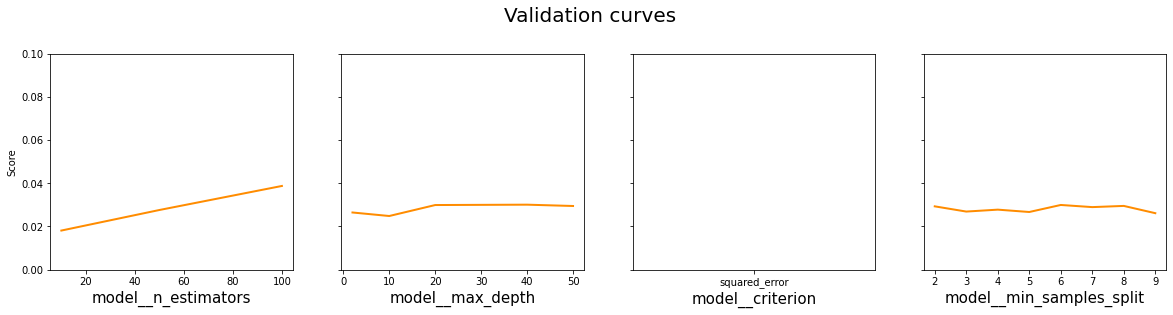

In [33]:
plot_error_on_grids(grid_pipeline, parameters, y_limit=0.1)

In [25]:
kfold = KFold(n_splits = 8)

grid_pipeline = GridSearchCV(model,parameters, n_jobs=10, cv=kfold, scoring='neg_mean_absolute_error')

np.random.seed(42)

grid_pipeline.fit(x_train,y_train)

print("Best: %f using %s" % (grid_pipeline.best_score_, grid_pipeline.best_params_))
rick()

Best: -13.278408 using {'model__criterion': 'squared_error', 'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [26]:
error_log(grid_pipeline, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 10.245749
Mean squared error 294.619814



error on training data

Mean absolute error 4.902383
Mean squared error 72.486273


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 64.439329    1.918829
Sample 74 th actual value: 45.999000    predicted value: 58.725180    -27.666209
Sample 16 th actual value: 98.989000    predicted value: 88.887874    10.204292
Sample 98 th actual value: 57.000000    predicted value: 54.314098    4.712109
Sample 153 th actual value: 230.000000    predicted value: 163.847915    28.761776
Sample 154 th actual value: 20.500000    predicted value: 14.429440    29.612488
Sample 126 th actual value: 53.990000    predicted value: 52.366864    3.006364
Sample 74 th actual value: 45.999000    predicted value: 58.725180    -27.666209
Sample 73 th actual value: 36.979000    predicted value: 32.603281    11.832984
Sample 75 th actual value: 25.979000    predicted value: 27.237140    -4.842912




In [34]:
kfold = KFold(n_splits = 10)

grid_pipeline = GridSearchCV(model,parameters, n_jobs=10, cv=kfold, scoring='neg_mean_absolute_error')

np.random.seed(42)

grid_pipeline.fit(x_train,y_train)

print("Best: %f using %s" % (grid_pipeline.best_score_, grid_pipeline.best_params_))
rick()

Best: -12.669793 using {'model__criterion': 'squared_error', 'model__max_depth': 50, 'model__min_samples_split': 2, 'model__n_estimators': 50}


In [35]:
error_log(grid_pipeline, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 10.578719
Mean squared error 314.547630



error on training data

Mean absolute error 4.836582
Mean squared error 75.872868


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 64.394863    1.986510
Sample 74 th actual value: 45.999000    predicted value: 57.666187    -25.364001
Sample 16 th actual value: 98.989000    predicted value: 88.287620    10.810676
Sample 98 th actual value: 57.000000    predicted value: 57.805960    -1.413965
Sample 153 th actual value: 230.000000    predicted value: 166.343820    27.676600
Sample 154 th actual value: 20.500000    predicted value: 14.608800    28.737561
Sample 126 th actual value: 53.990000    predicted value: 53.122700    1.606409
Sample 74 th actual value: 45.999000    predicted value: 57.666187    -25.364001
Sample 73 th actual value: 36.979000    predicted value: 33.134160    10.397361
Sample 75 th actual value: 25.979000    predicted value: 26.988640    -3.886370



In [10]:
from sklearn.svm import SVR

model2 = Pipeline([('preprocess', box), ('model', SVR())])

kfold = KFold(n_splits = 10)

parameters2 = {
    'model__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'model__degree':[1, 2, 4, 8, 10, 12, 14],
    'model__gamma':['scale', 'auto'],
    'model__C':[0.01, 0.05, 0.1, 0.02, 0.5, 0.7, 0.9, 1.0]
}

grid_pipeline2 = GridSearchCV(model2, parameters2, cv=kfold, scoring='neg_mean_absolute_error')
grid_pipeline2

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         Index(['CPU Generation', 'Core', 'Cache', 'RAM', 'HDD', 'SSD', 'Graphic RAM',
       'Blore screen', 'Keyboard light', 'Battery houre', 'Battery Cells',
       'Battery Capacity', 'Size per Inch/', 'Touch screen']...
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['CPU Detail', 'CPU Manufacturer', 'CPU Arc', 'Graphic-creator'], dtype='object'))])),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.01, 0.05, 0.1, 0.02, 0.5, 0.7, 0.9,
                                      1.0],
                         'model__degree': [1, 2, 4, 8, 10, 12, 14],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_absolute_error')

In [37]:
np.random.seed(42)

grid_pipeline2.fit(x_train, y_train)

print("Best: %f using %s" % (grid_pipeline2.best_score_, grid_pipeline2.best_params_))
rick()

Best: -20.006538 using {'model__C': 0.7, 'model__degree': 1, 'model__gamma': 'scale', 'model__kernel': 'linear'}


In [38]:
error_log(grid_pipeline2, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 15.450424
Mean squared error 635.147176



error on training data

Mean absolute error 16.720685
Mean squared error 981.813336


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 77.994209    -18.712647
Sample 74 th actual value: 45.999000    predicted value: 51.888521    -12.803585
Sample 16 th actual value: 98.989000    predicted value: 79.610397    19.576522
Sample 98 th actual value: 57.000000    predicted value: 55.916222    1.901365
Sample 153 th actual value: 230.000000    predicted value: 197.499717    14.130558
Sample 154 th actual value: 20.500000    predicted value: 32.483701    -58.457080
Sample 126 th actual value: 53.990000    predicted value: 63.470292    -17.559348
Sample 74 th actual value: 45.999000    predicted value: 51.888521    -12.803585
Sample 73 th actual value: 36.979000    predicted value: 27.881943    24.600604
Sample 75 th actual value: 25.979000    predicted value: 23.887657    8.050

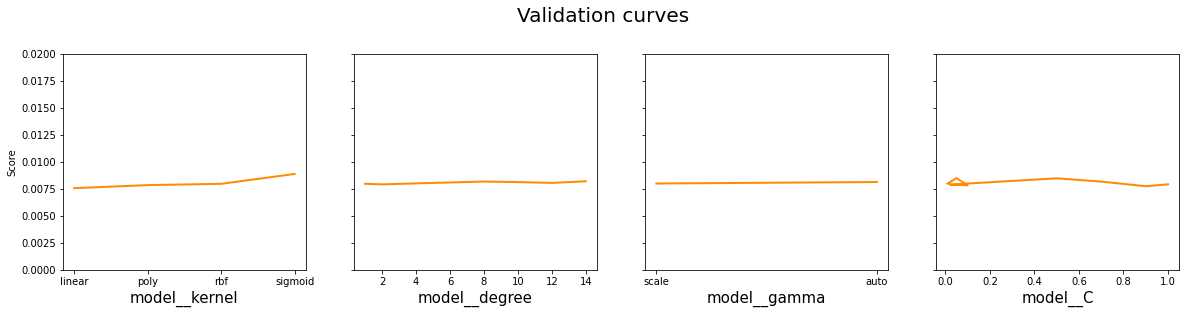

In [39]:
plot_error_on_grids(grid_pipeline2, parameters2, y_limit=0.02)

In [41]:
kfold = KFold(n_splits = 8)

grid_pipeline2 = GridSearchCV(model2, parameters2, cv=kfold, scoring='neg_mean_absolute_error')

grid_pipeline2.fit(x_train, y_train)

print("Best: %f using %s" % (grid_pipeline2.best_score_, grid_pipeline2.best_params_))

rick()

error_log(grid_pipeline2, x_train, y_train, x_test, y_test)

Best: -20.199033 using {'model__C': 1.0, 'model__degree': 1, 'model__gamma': 'scale', 'model__kernel': 'linear'}



error on test data

Mean absolute error 15.344651
Mean squared error 625.126332



error on training data

Mean absolute error 16.526096
Mean squared error 961.309214


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 80.298882    -22.220521
Sample 74 th actual value: 45.999000    predicted value: 51.677665    -12.345192
Sample 16 th actual value: 98.989000    predicted value: 79.608380    19.578559
Sample 98 th actual value: 57.000000    predicted value: 56.061321    1.646806
Sample 153 th actual value: 230.000000    predicted value: 200.222710    12.946648
Sample 154 th actual value: 20.500000    predicted value: 31.916754    -55.691484
Sample 126 th actual value: 53.990000    predicted value: 63.393405    -17.416938
Sample 74 th actual value: 45.999000    predicted value: 51.677665    -12.345192
Sample 73 th actual value: 36.979000    predicted value: 27.917652    24.504038
Sample 75 th actual value: 25.979000    predicted value: 23.648417    8.971

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

model3 = Pipeline([('preprocess', box), ('model', GradientBoostingRegressor())])

kfold = KFold(n_splits = 5)

parameters3 = {
    'model__loss':['squared_error'],
    'model__learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
    'model__n_estimators':[50, 70, 100],
    'model__max_depth':[3, 5, 7, 9],
    'model__random_state':[42],
    'model__max_features':[5, 10, 15]
}

grid_pipeline3 = GridSearchCV(model3, parameters3, cv=kfold, scoring='neg_mean_absolute_error')
grid_pipeline3

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         Index(['CPU Generation', 'Core', 'Cache', 'RAM', 'HDD', 'SSD', 'Graphic RAM',
       'Blore screen', 'Keyboard light', 'Battery houre', 'Battery Cells',
       'Battery Capacity', 'Size per Inch/', 'Touch screen'],...
                                                                         Index(['CPU Detail', 'CPU Manufacturer', 'CPU Arc', 'Graphic-creator'], dtype='object'))])),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1],
                         'model__loss': ['squared_error'],
                         'model__max_depth': [3, 5, 7, 9],
                         'model__max_features': [5, 10, 15],
                         'model__n_estimators': [50, 70, 100],
                         'model__random_state': [42]},
             scoring='neg_mean_absolute_error')

In [42]:
np.random.seed(42)

grid_pipeline3.fit(x_train, y_train)

print("Best: %f using %s" % (grid_pipeline3.best_score_, grid_pipeline3.best_params_))
rick()

Best: 0.828926 using {'model__learning_rate': 0.1, 'model__loss': 'squared_error', 'model__max_depth': 7, 'model__max_features': 15, 'model__n_estimators': 100, 'model__random_state': 42}


In [43]:
error_log(grid_pipeline3, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 9.827546
Mean squared error 317.785784



error on training data

Mean absolute error 3.982303
Mean squared error 35.146643


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 72.382904    -10.171848
Sample 74 th actual value: 45.999000    predicted value: 49.874545    -8.425281
Sample 16 th actual value: 98.989000    predicted value: 99.791167    -0.810360
Sample 98 th actual value: 57.000000    predicted value: 59.561489    -4.493840
Sample 153 th actual value: 230.000000    predicted value: 141.210580    38.604096
Sample 154 th actual value: 20.500000    predicted value: 22.283313    -8.699089
Sample 126 th actual value: 53.990000    predicted value: 50.860681    5.796108
Sample 74 th actual value: 45.999000    predicted value: 49.874545    -8.425281
Sample 73 th actual value: 36.979000    predicted value: 31.054788    16.020478
Sample 75 th actual value: 25.979000    predicted value: 27.589884    -6.200716




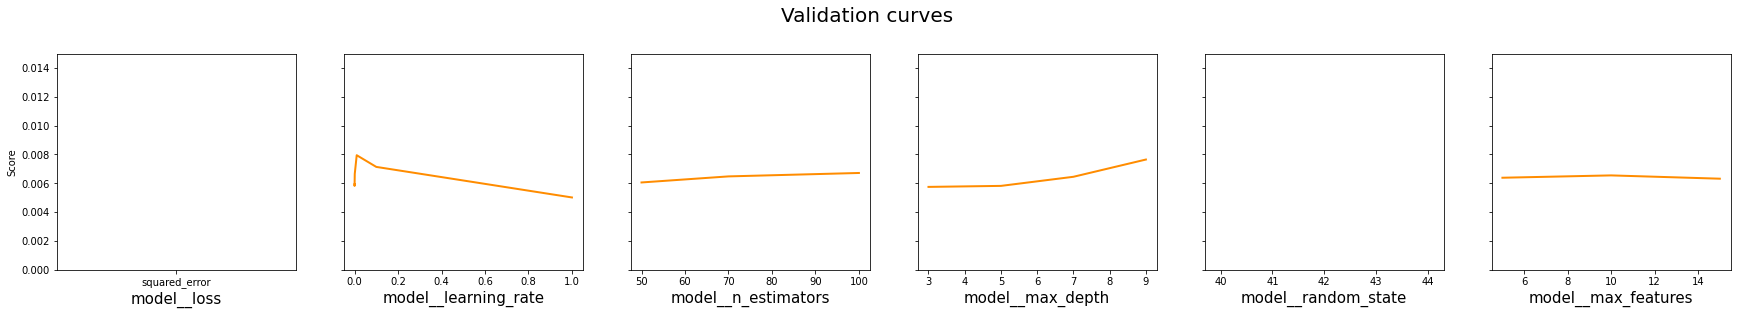

In [44]:
plot_error_on_grids(grid_pipeline3, parameters3, y_limit=0.015)

In [45]:
kfold = KFold(n_splits = 8)

grid_pipeline3 = GridSearchCV(model3, parameters3, cv=kfold, scoring='neg_mean_absolute_error')

np.random.seed(42)

grid_pipeline3.fit(x_train, y_train)

print("Best: %f using %s" % (grid_pipeline3.best_score_, grid_pipeline3.best_params_))
rick()

error_log(grid_pipeline3, x_train, y_train, x_test, y_test)

Best: -11.874975 using {'model__learning_rate': 0.1, 'model__loss': 'squared_error', 'model__max_depth': 9, 'model__max_features': 10, 'model__n_estimators': 100, 'model__random_state': 42}



error on test data

Mean absolute error 10.585524
Mean squared error 318.992743



error on training data

Mean absolute error 2.662646
Mean squared error 18.720859


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 73.592715    -12.013265
Sample 74 th actual value: 45.999000    predicted value: 48.270110    -4.937303
Sample 16 th actual value: 98.989000    predicted value: 76.218072    23.003493
Sample 98 th actual value: 57.000000    predicted value: 59.338749    -4.103069
Sample 153 th actual value: 230.000000    predicted value: 147.799787    35.739223
Sample 154 th actual value: 20.500000    predicted value: 19.540447    4.680746
Sample 126 th actual value: 53.990000    predicted value: 56.131181    -3.965885
Sample 74 th actual value: 45.999000    predicted value: 48.270110    -4.937303
Sample 73 th actual value: 36.979000    predicted value: 33.747355    8.739135
Sample 75 th actual value: 25.979000    predicted value: 27.086005    -4.261152




In [46]:
kfold = KFold(n_splits = 3)

grid_pipeline3 = GridSearchCV(model3, parameters3, cv=kfold, scoring='neg_mean_absolute_error')

np.random.seed(42)

grid_pipeline3.fit(x_train, y_train)

print("Best: %f using %s" % (grid_pipeline3.best_score_, grid_pipeline3.best_params_))
rick()

error_log(grid_pipeline3, x_train, y_train, x_test, y_test)

Best: -12.350216 using {'model__learning_rate': 0.1, 'model__loss': 'squared_error', 'model__max_depth': 7, 'model__max_features': 10, 'model__n_estimators': 100, 'model__random_state': 42}



error on test data

Mean absolute error 10.178756
Mean squared error 288.969931



error on training data

Mean absolute error 4.748040
Mean squared error 52.361341


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 62.906992    4.251153
Sample 74 th actual value: 45.999000    predicted value: 51.756975    -12.517610
Sample 16 th actual value: 98.989000    predicted value: 88.950865    10.140657
Sample 98 th actual value: 57.000000    predicted value: 57.451638    -0.792348
Sample 153 th actual value: 230.000000    predicted value: 196.593412    14.524604
Sample 154 th actual value: 20.500000    predicted value: 21.534777    -5.047695
Sample 126 th actual value: 53.990000    predicted value: 56.428928    -4.517369
Sample 74 th actual value: 45.999000    predicted value: 51.756975    -12.517610
Sample 73 th actual value: 36.979000    predicted value: 32.903006    11.022456
Sample 75 th actual value: 25.979000    predicted value: 26.613426    -2.442074


In [12]:
from sklearn.linear_model import Ridge

model4 = Pipeline([('preprocess', box), ('model', Ridge())])

kfold = KFold(n_splits = 5)

parameters4 = {
    'model__alpha':[0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 1],
    'model__max_iter':[100, 500, 800],
    'model__solver':['auto', 'lsqr']
}

grid_pipeline4 = GridSearchCV(model4, parameters4, cv=kfold, scoring='neg_mean_absolute_error')
grid_pipeline4

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         Index(['CPU Generation', 'Core', 'Cache', 'RAM', 'HDD', 'SSD', 'Graphic RAM',
       'Blore screen', 'Keyboard light', 'Battery houre', 'Battery Cells',
       'Battery Capacity', 'Size per Inch/', 'Touch screen'],
      dtype='object')),
                                                                        ('categurical_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['CPU Detail', 'CPU Manufacturer', 'CPU Arc', 'Graphic-creator'], dtype='object'))])),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 1],
                         'model__max_iter': [100, 500, 800],
                         'model__solver': ['auto', 'lsqr']},
             scoring='neg_mean_absolute_error')

In [52]:
np.random.seed(42)

grid_pipeline4.fit(x_train, y_train)
print("Best: %f using %s" % (grid_pipeline4.best_score_, grid_pipeline4.best_params_))
rick()
error_log(grid_pipeline4, x_train, y_train, x_test, y_test)

Best: -21.728619 using {'model__alpha': 1, 'model__max_iter': 100, 'model__solver': 'auto'}



error on test data

Mean absolute error 16.714788
Mean squared error 605.802300



error on training data

Mean absolute error 16.542669
Mean squared error 717.633368


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 76.501404    -16.440492
Sample 74 th actual value: 45.999000    predicted value: 55.807988    -21.324352
Sample 16 th actual value: 98.989000    predicted value: 72.859393    26.396475
Sample 98 th actual value: 57.000000    predicted value: 60.787754    -6.645182
Sample 153 th actual value: 230.000000    predicted value: 261.436157    -13.667894
Sample 154 th actual value: 20.500000    predicted value: 29.393855    -43.384660
Sample 126 th actual value: 53.990000    predicted value: 64.499809    -19.466214
Sample 74 th actual value: 45.999000    predicted value: 55.807988    -21.324352
Sample 73 th actual value: 36.979000    predicted value: 29.295514    20.777970
Sample 75 th actual value: 25.979000    predicted value: 24.259783    6.6

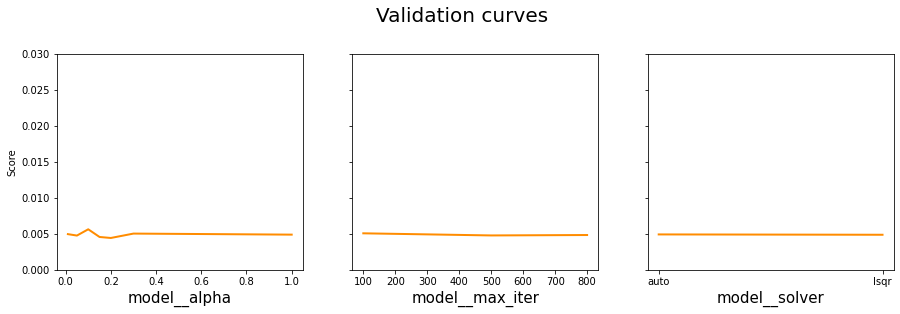

In [53]:
plot_error_on_grids(grid_pipeline4, parameters4, y_limit=0.03)

In [13]:
from sklearn.linear_model import Lasso

model6 = Pipeline([('preprocess', box), ('model', Lasso())])

kfold = KFold(n_splits = 5)

parameters6 = {
    'model__alpha':[0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 1],
    'model__max_iter':[100, 500, 800],
}

grid_pipeline6 = GridSearchCV(model6, parameters6, cv=kfold, scoring='neg_mean_absolute_error')
grid_pipeline6

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         Index(['CPU Generation', 'Core', 'Cache', 'RAM', 'HDD', 'SSD', 'Graphic RAM',
       'Blore screen', 'Keyboard light', 'Battery houre', 'Battery Cells',
       'Battery Capacity', 'Size per Inch/', 'Touch screen'],
      dtype='object')),
                                                                        ('categurical_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['CPU Detail', 'CPU Manufacturer', 'CPU Arc', 'Graphic-creator'], dtype='object'))])),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 1],
                         'model__max_iter': [100, 500, 800]},
             scoring='neg_mean_absolute_error')

In [61]:
np.random.seed(42)

grid_pipeline6.fit(x_train, y_train)
print("Best: %f using %s" % (grid_pipeline6.best_score_, grid_pipeline6.best_params_))
rick()

error_log(grid_pipeline6, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3949.9112860882888, tolerance: 176.6823360151978
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1065.6554923536605, tolerance: 179.73485990333566
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1176.7026011365815, tolerance: 196.83595655377422
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: Converg

Best: -21.455229 using {'model__alpha': 0.2, 'model__max_iter': 100}



error on test data

Mean absolute error 16.119554
Mean squared error 555.749522



error on training data

Mean absolute error 17.201374
Mean squared error 775.081643


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 75.224874    -14.497525
Sample 74 th actual value: 45.999000    predicted value: 55.818930    -21.348137
Sample 16 th actual value: 98.989000    predicted value: 75.334784    23.895802
Sample 98 th actual value: 57.000000    predicted value: 60.676658    -6.450276
Sample 153 th actual value: 230.000000    predicted value: 244.456551    -6.285457
Sample 154 th actual value: 20.500000    predicted value: 30.941032    -50.931862
Sample 126 th actual value: 53.990000    predicted value: 65.230306    -20.819238
Sample 74 th actual value: 45.999000    predicted value: 55.818930    -21.348137
Sample 73 th actual value: 36.979000    predicted value: 29.374228    20.565110
Sample 75 th actual value: 25.979000    predicted value: 25.582090    1.52

Boath Lasso and Ridge models tested with different k-fold values, But the result was not changed

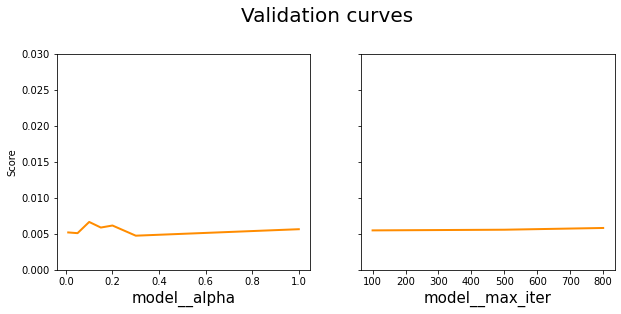

In [62]:
plot_error_on_grids(grid_pipeline6, parameters6, y_limit=0.03)

In [14]:
import xgboost as xgb

model7 = Pipeline([('preprocess', box), ('model', xgb.XGBRegressor(objective="reg:linear", random_state=42))])

kfold = KFold(n_splits = 10)

parameters7 = {
    'model__booster':['gbtree', 'gblinear'],
    'model__eta':[0.1, 0.2, 0.3],
    'model__lambda':[1.0, 0.5, 0],
    'model__alpha':[1.0, 0.5, 0],
    'model__max_depth':[5, 6, 7, 8]
}

grid_pipeline7 = GridSearchCV(model7, parameters7, cv=kfold, scoring='neg_mean_absolute_error')
grid_pipeline7


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         Index(['CPU Generation', 'Core', 'Cache', 'RAM', 'HDD', 'SSD', 'Graphic RAM',
       'Blore screen', 'Keyboard light', 'Battery houre', 'Battery Cells',
       'Battery Capacity', 'Size per Inch/', 'Touch screen']...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     objective='reg:linear',
                                                     predictor=None, ...))]),
             param_grid={'model__alpha': [1.0, 0.5, 0],
                         'model__booster': ['gbtree', 'gblinear'],
                         'model__eta': [0.1, 0.2, 0.3],
                         'model__lambda': [1.0, 0.5, 0],
                         'model__max_depth': [5, 6, 7, 8]},
             scoring='neg_mean_absolute_error')

In [64]:
np.random.seed(42)

grid_pipeline7.fit(x_train, y_train)
print("Best: %f using %s" % (grid_pipeline7.best_score_, grid_pipeline7.best_params_))
rick()

[22:36:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:51] WARNING: ../src/objective/regression_

In [65]:
error_log(grid_pipeline7, x_train, y_train, x_test, y_test)


error on test data

Mean absolute error 9.583567
Mean squared error 238.389315



error on training data

Mean absolute error 4.170342
Mean squared error 37.508252


Some sample on test data

Sample 82 th actual value: 65.700000    predicted value: 67.359413    -2.525743
Sample 74 th actual value: 45.999000    predicted value: 48.142170    -4.659166
Sample 16 th actual value: 98.989000    predicted value: 98.563683    0.429661
Sample 98 th actual value: 57.000000    predicted value: 48.733356    14.502883
Sample 153 th actual value: 230.000000    predicted value: 222.817993    3.122612
Sample 154 th actual value: 20.500000    predicted value: 16.521713    19.406277
Sample 126 th actual value: 53.990000    predicted value: 46.685341    13.529652
Sample 74 th actual value: 45.999000    predicted value: 48.142170    -4.659166
Sample 73 th actual value: 36.979000    predicted value: 32.067394    13.282149
Sample 75 th actual value: 25.979000    predicted value: 26.693905    -2.751857



S

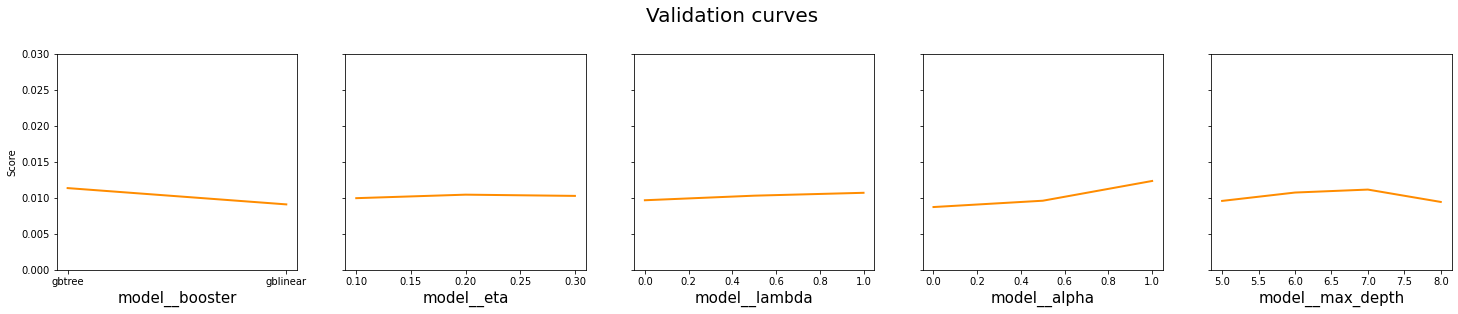

In [66]:
plot_error_on_grids(grid_pipeline7, parameters7, y_limit=0.03)

In [67]:
from sklearn.preprocessing import MinMaxScaler

ndf2 = pd.get_dummies(ndf, columns=categurical_columns)

y = ndf2[target]
x = ndf2.drop(target, axis=1)

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape

(901, 99)

In [68]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective="reg:linear", random_state=42, alpha=0.5, booster='gbtree', eta='0.3', max_depth=5)

evalset = [(x_train, y_train), (x_test,y_test)]

model_xgb.fit(x_train, y_train, eval_metric='logloss', eval_set=evalset)

results = model_xgb.evals_result()

[22:41:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-logloss:-2304.49533	validation_1-logloss:-2242.41510
[1]	validation_0-logloss:-2335.52590	validation_1-logloss:-2272.67430
[2]	validation_0-logloss:-2350.76005	validation_1-logloss:-2287.16158
[3]	validation_0-logloss:-2359.64472	validation_1-logloss:-2295.47833
[4]	validation_0-logloss:-2365.17339	validation_1-logloss:-2300.71424
[5]	validation_0-logloss:-2368.96071	validation_1-logloss:-2304.40855
[6]	validation_0-logloss:-2371.51897	validation_1-logloss:-2306.84736
[7]	validation_0-logloss:-2373.36439	validation_1-logloss:-2308.65521
[8]	validation_0-logloss:-2374.58704	validation_1-logloss:-2309.63070


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:-2375.43873	validation_1-logloss:-2310.51474
[10]	validation_0-logloss:-2376.12407	validation_1-logloss:-2311.12168
[11]	validation_0-logloss:-2376.61080	validation_1-logloss:-2311.58991
[12]	validation_0-logloss:-2376.98578	validation_1-logloss:-2311.89966
[13]	validation_0-logloss:-2377.29471	validation_1-logloss:-2312.22231
[14]	validation_0-logloss:-2377.51547	validation_1-logloss:-2312.41786
[15]	validation_0-logloss:-2377.61698	validation_1-logloss:-2312.48648
[16]	validation_0-logloss:-2377.72579	validation_1-logloss:-2312.58110
[17]	validation_0-logloss:-2377.82144	validation_1-logloss:-2312.72674
[18]	validation_0-logloss:-2377.87384	validation_1-logloss:-2312.74837
[19]	validation_0-logloss:-2377.94205	validation_1-logloss:-2312.88257
[20]	validation_0-logloss:-2377.98264	validation_1-logloss:-2312.91904
[21]	validation_0-logloss:-2378.04153	validation_1-logloss:-2312.91392
[22]	validation_0-logloss:-2378.09787	validation_1-logloss:-2312.95932
[23]	va

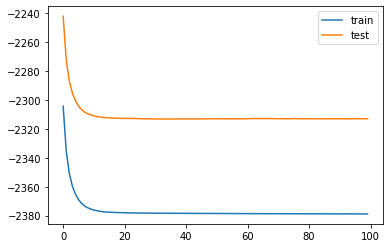

In [69]:
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [47]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Softmax, Dropout
from tensorflow.keras.activations import relu, sigmoid, tanh
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.regularizers import l2

model = Sequential()

model.add(Dense(99, activation=relu, kernel_regularizer=l2(1e-1), bias_regularizer=l2(1e-1), input_shape=(101,)))
model.add(Dropout(0.5))
model.add(Dense(500, activation=relu, kernel_regularizer=l2(1e-1), bias_regularizer=l2(1e-1)))
model.add(Dropout(0.5))
model.add(Dense(1, activation=relu, kernel_regularizer=l2(1e-4), bias_regularizer=l2(1e-4)))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 99)                10098     
                                                                 
 dropout_12 (Dropout)        (None, 99)                0         
                                                                 
 dense_19 (Dense)            (None, 500)               50000     
                                                                 
 dropout_13 (Dropout)        (None, 500)               0         
                                                                 
 dense_20 (Dense)            (None, 1)                 501       
                                                                 
Total params: 60,599
Trainable params: 60,599
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer=Adam(learning_rate = 0.0001), loss='MeanSquaredError', metrics=['MeanSquaredError'])
tf.keras.losses.MeanSquaredError
early_stop = 32
earlyStop = EarlyStopping(monitor='val_loss', patience=early_stop, verbose=1, mode='auto')

check_point_name = 'best_weight.hdf5'
check_point = ModelCheckpoint(filepath = check_point_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=1000,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[earlyStop, check_point],
                    shuffle=True)
rick()

Epoch 1/1000
25/29 [========================>.....] - ETA: 0s - loss: 6043.4927 - mean_squared_error: 6017.2183
Epoch 1: val_loss improved from inf to 5348.87256, saving model to best_weight.hdf5
29/29 [==============================] - 2s 14ms/step - loss: 6064.8403 - mean_squared_error: 6038.5986 - val_loss: 5348.8726 - val_mean_squared_error: 5322.9365
Epoch 2/1000
25/29 [========================>.....] - ETA: 0s - loss: 5751.1035 - mean_squared_error: 5725.3579
Epoch 2: val_loss improved from 5348.87256 to 5282.05859, saving model to best_weight.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 6004.6919 - mean_squared_error: 5978.9688 - val_loss: 5282.0586 - val_mean_squared_error: 5256.5576
Epoch 3/1000
21/29 [====================>.........] - ETA: 0s - loss: 5722.0879 - mean_squared_error: 5696.7075
Epoch 3: val_loss improved from 5282.05859 to 5192.07080, saving model to best_weight.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 5925.1699 - me

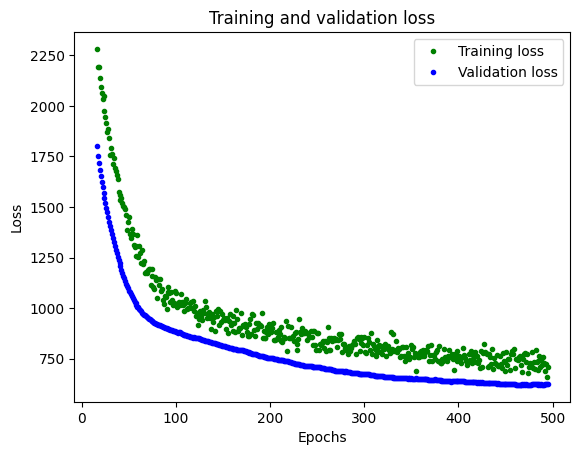

In [53]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

SKIP = 15
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
error_log(model, x_train, y_train, x_test, y_test)


error on test data

5/5 [==============================] - 0s 3ms/step
Mean absolute error 15.053456
Mean squared error 584.413056



error on training data

29/29 [==============================] - 0s 2ms/step
Mean absolute error 13.794905
Mean squared error 605.143136


Some sample on test data

5/5 [==============================] - 0s 3ms/step
Sample 82 th actual value: 65.700000    predicted value: 71.882622    -9.410388
Sample 74 th actual value: 45.999000    predicted value: 52.615620    -14.384267
Sample 16 th actual value: 98.989000    predicted value: 56.898216    42.520668
Sample 98 th actual value: 57.000000    predicted value: 58.353321    -2.374248
Sample 153 th actual value: 230.000000    predicted value: 271.137207    -17.885742
Sample 154 th actual value: 20.500000    predicted value: 26.638817    -29.945448
Sample 126 th actual value: 53.990000    predicted value: 57.471458    -6.448336
Sample 74 th actual value: 45.999000    predicted value: 52.615620    -14.384267
